<a href="https://colab.research.google.com/github/alimoorreza/cs195-fall24-notes/blob/main/cs195_linear_filtering_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS195: Day03
## Linear filtering: convolution

#### CS195: Computer Vision, Fall 2024

Wednesday, September 4th, 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs195_fall24/cs195_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs195_fall24/cs195_syllabus_fall24.pdf)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(164, 177, 3)
(164, 177)


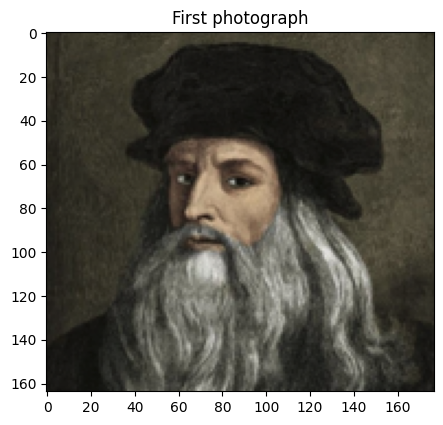

In [17]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np
import pdb
import sys
from scipy.io import savemat

img_pil = Image.open('/content/drive/MyDrive/cs195_fall24/low_level_vision/images/da_vinci_lowres.png').convert('RGB')
#img_pil_gray = Image.open('/content/drive/MyDrive/cs195_sp22/week2/da_vinci.png').convert('L')
img_pil_array = np.asarray(img_pil)

plt.figure(figsize=(5,5)) # figure size (5 inch, 5 inch)
plt.imshow(img_pil_array, cmap='gray')
plt.title('First photograph')
print(img_pil_array.shape)

rows = img_pil_array.shape[0]
cols = img_pil_array.shape[1]
#print(rows, cols)

# get the separate channels
img_pil_array_r = np.array(img_pil.getchannel(0))
img_pil_array_g = np.array(img_pil.getchannel(1))
img_pil_array_b = np.array(img_pil.getchannel(2))

print(img_pil_array_r.shape)

In [6]:
def get_normal_dist1d(x, mean_mu, std_sigma):
  numer = np.exp(-(x - mean_mu)**2/(2*std_sigma**2))
  denom = (2*np.pi*(std_sigma**2))**0.5
  return numer/denom

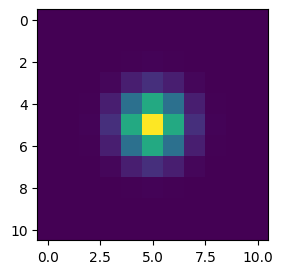

In [29]:
# kernel H_1 parameters
k           = 5
kernel_size = 2*k+1 # kernel of size (2k+1, 2k+1)
mean_mu     = 0
std_sigma   = 1
H_1         = np.ones((kernel_size, kernel_size))

indices_x = [x for x in range(-k, k+1)]
indices_y = [y for y in range(-k, k+1)]

for y in indices_y:
  for x in indices_x:
    H_1[y+k, x+k] = get_normal_dist1d(x, mean_mu, std_sigma)*get_normal_dist1d(y, mean_mu, std_sigma)


'''
H_img = Image.fromarray(H.astype('uint8'), 'L')
H_img.save('gaussian_kernel_kernel_' + str(kernel_size) + '.png')
print(sum(H.flatten()))
savemat('gaussian_kernel_' + str(kernel_size) + '_' + str(std_sigma) + '.mat', {'kernel':H})

'''
plt.figure(figsize=(3,3))
plt.imshow(H_1)

#**Group activity\#1: Modify the Gaussian filter parameters and observe how the changes affect the kernel values at different locations**
> Try Gaussian kernel parameters:

>> of size 21x21, mean=0, standard deviation=5

>> of size 21x21, mean=0, standard deviation=10


> Observe how the The nice thing about the smooth Gaussian filter is it emphasizes the highly on the center pixel.

> Smooth Gaussian filter emphasized the pixel data that is right at the center, it will also incorporate the data that are further out but they can not contribute as heavily as the center pixel. Because the value at the center of the Gaussian kernel has the highest magnitude.


In [ ]:
# your code here for Gaussian filter of size 21x21, mean=0, standard deviation=5
# use variable name 'H_2' for filter



In [ ]:
# your code here for Gaussian filter of size 21x21, mean=0, standard deviation=10
# use variable name 'H_3' for filter



#**Compute convolution operation with the Gaussian filters**

In [30]:
def compute_convolution_grayscale(img_pil_array, H, k, kernel_size):

  # compute convolution
  F                 = img_pil_array
  new_img_pil_array = np.zeros((img_pil_array.shape[0], img_pil_array.shape[1]))

  i = 0
  for y in range(kernel_size, rows-kernel_size):
    for x in range(kernel_size, cols-kernel_size):

      # compute convolution centered at pixel location (x, y)
      # old_pixel_value = F.getpixel((x, y))

      old_pixel_value = F[y, x]
      new_pixel_value = 0.0

      for v_row in range(-k,k+1):
        for u_col in range(-k,k+1):
          #cur_pixel_value  = F.getpixel((x - u_col, y - v_row))
          cur_pixel_value  = F[y - v_row, x - u_col]
          cur_kernel_value = H[v_row + k, u_col + k] # small trick to adjust the indexing
          new_pixel_value  = new_pixel_value + float(cur_pixel_value)*cur_kernel_value

      # update the value at location (x,y) with newly computed pixel value
      #new_img.putpixel((x, y), round(new_pixel_value))
      new_img_pil_array[y, x] = round(new_pixel_value)
      #print('old_value=', old_pixel_value, ': new_value=', round(new_pixel_value))
      i = i + 1
      #if (i == 100):
      #  sys.exit()

  return new_img_pil_array

Text(0.5, 1.0, 'Convolved image with Gaussian kernel (0,1)')

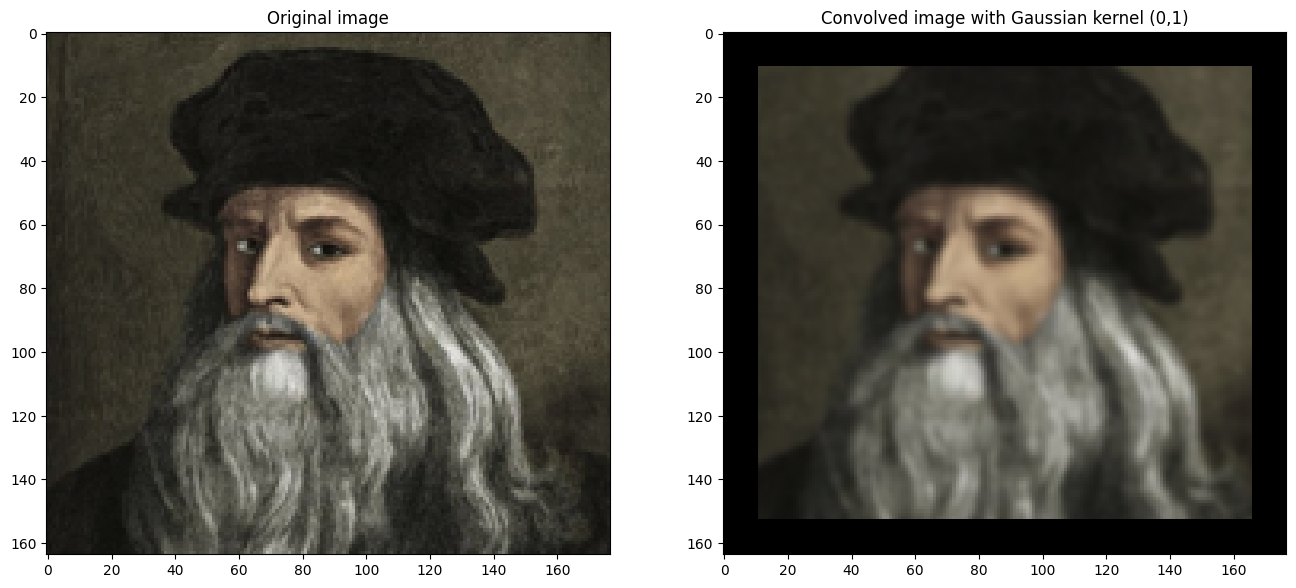

In [31]:
new_img_pil_array_r      = compute_convolution_grayscale(img_pil_array_r, H_1, k, kernel_size)
new_img_pil_array_g      = compute_convolution_grayscale(img_pil_array_g, H_1, k, kernel_size)
new_img_pil_array_b      = compute_convolution_grayscale(img_pil_array_b, H_1, k, kernel_size)
new_img_pil_array        = np.zeros((img_pil_array_r.shape[0], img_pil_array_r.shape[1], 3))
new_img_pil_array[:,:,0] = new_img_pil_array_r
new_img_pil_array[:,:,1] = new_img_pil_array_g
new_img_pil_array[:,:,2] = new_img_pil_array_b
new_img = Image.fromarray(new_img_pil_array.astype('uint8'), mode='RGB')

#savemat('convolved.mat', {'red_channel':new_img_pil_array_r})
#new_img = Image.fromarray(new_img_pil_array_r, mode='L')
fig, axes = plt.subplots(1,2, figsize=(16, 16))
ax = axes[0]
ax.imshow(img_pil_array, cmap='gray')
ax.set_title('Original image')
ax = axes[1]
ax.imshow(new_img)
ax.set_title('Convolved image with Gaussian kernel (' + str(mean_mu) + ',' + str(std_sigma) + ')')
#new_img.save('davinci_convolved_gaussian_kernel_' + str(kernel_size) + '_sigma_' + str(std_sigma) + '.png')
#img_pil = ImageOps.grayscale(img_pil)

#**Group activity\#2: Apply the filters you created in Activity\#1 (i.e., H_2 and H_3) in a convolution operation to the Da Vinci image and observe the effects**

In [ ]:
# your code




In [ ]:
# your code

